In [20]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split

In [21]:
df=pd.read_csv("WELFAKE_Dataset.csv",encoding='ISO-8859-1')

In [22]:
df.head()
# for show head of data in csv file

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMAâS ATTORNEY GENERAL SAYS ...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


df.sample(5)

In [23]:
# show only title column
df['title']

0        LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1                                                      NaN
2        UNBELIEVABLE! OBAMAâS ATTORNEY GENERAL SAYS ...
3        Bobby Jindal, raised Hindu, uses story of Chri...
4        SATAN 2: Russia unvelis an image of its terrif...
                               ...                        
72129    Russians steal research on Trump in hack of U....
72130     WATCH: Giuliani Demands That Democrats Apolog...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    Trump tussle gives unpopular Mexican leader mu...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: title, Length: 72134, dtype: object

In [24]:
df.title[10]
# df.Label[10]

' GOP Senator Just Smacked Down The Most Punchable Alt-Right Nazi On The Internet'

In [25]:
# show info of data
df.info

<bound method DataFrame.info of        Unnamed: 0                                              title  \
0               0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1               1                                                NaN   
2               2  UNBELIEVABLE! OBAMAâS ATTORNEY GENERAL SAYS ...   
3               3  Bobby Jindal, raised Hindu, uses story of Chri...   
4               4  SATAN 2: Russia unvelis an image of its terrif...   
...           ...                                                ...   
72129       72129  Russians steal research on Trump in hack of U....   
72130       72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131       72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132       72132  Trump tussle gives unpopular Mexican leader mu...   
72133       72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                                    text  label  
0      No comment is expected from Ba

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [27]:
#checking if there is any null value is there or not or missing value
df.isna().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [28]:
#dropping the columns id,images,date,web,category,axis=1 because we are dropping the coloumns not rows
df=df.drop(['Unnamed: 0'],axis=1)

In [29]:
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMAâS ATTORNEY GENERAL SAYS ...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


## DATA PREPROCESSING

In [30]:
#applying lowercase to title that will add less complexity in tokenization
df['title']=df['title'].str.lower()
df['text']=df['text'].str.lower()

In [31]:
df.head()

,title,text,label
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1
1,NaN,did they post their votes for hillary already?,1
2,unbelievable! obamaâs attorney general says ...,"now, most of the demonstrators gathered last ...",1
3,"bobby jindal, raised hindu, uses story of chri...",a dozen politically active pastors came here f...,0
4,satan 2: russia unvelis an image of its terrif...,"the rs-28 sarmat missile, dubbed satan 2, will...",1


In [32]:
df.isna().sum()

title    558
text      39
label      0
dtype: int64

In [33]:
df.shape

(72134, 3)

In [34]:
df.head()

,title,text,label
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1
1,NaN,did they post their votes for hillary already?,1
2,unbelievable! obamaâs attorney general says ...,"now, most of the demonstrators gathered last ...",1
3,"bobby jindal, raised hindu, uses story of chri...",a dozen politically active pastors came here f...,0
4,satan 2: russia unvelis an image of its terrif...,"the rs-28 sarmat missile, dubbed satan 2, will...",1


In [35]:
#the label dataset is slightly unbalanced
df['label'].value_counts()

label
1    37106
0    35028
Name: count, dtype: int64

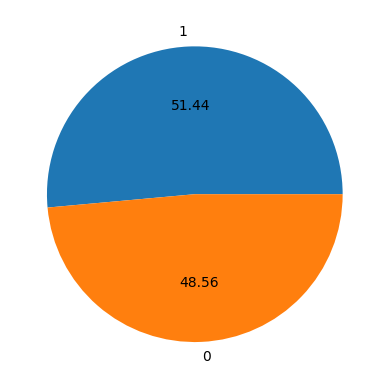

In [36]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels=['1','0'],autopct="%0.2f")
plt.show()

In [37]:
import nltk
#it is used in natural language 

In [38]:
# Convert 'title' and 'text' columns to string type if they're not already
df['title'] = df['title'].astype(str)
df['text'] = df['text'].astype(str)

# Calculate the total number of characters in each row (sum of 'title' and 'text' lengths)
df['num_characters'] = df['title'].str.len() + df['text'].str.len()


In [39]:
df.head()

,title,text,label,num_characters
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1,5179
1,nan,did they post their votes for hillary already?,1,49
2,unbelievable! obamaâs attorney general says ...,"now, most of the demonstrators gathered last ...",1,361
3,"bobby jindal, raised hindu, uses story of chri...",a dozen politically active pastors came here f...,0,8226
4,satan 2: russia unvelis an image of its terrif...,"the rs-28 sarmat missile, dubbed satan 2, will...",1,2033


df.Statement[0]

In [40]:
df.title[0]

'law enforcement on high alert following threats against cops and whites on 9-11by #blacklivesmatter and #fyf911 terrorists [video]'

In [41]:
df[df['label'] == 0].head()


,title,text,label,num_characters
3,"bobby jindal, raised hindu, uses story of chri...",a dozen politically active pastors came here f...,0,8226
11,"may brexit offer would hurt, cost eu citizens ...",brussels (reuters) - british prime minister th...,0,2373
12,schumer calls on trump to appoint official to ...,"washington (reuters) - charles schumer, the to...",0,2743
14,no change expected for espn political agenda d...,as more and more sports fans turn off espn to ...,0,3205
15,billionaire odebrecht in brazil scandal releas...,rio de janeiro/sao paulo (reuters) - billionai...,0,1719


In [42]:
import nltk

# Assuming 'title' and 'text' columns are already converted to string
df['num_words'] = df['title'].apply(lambda x: len(nltk.word_tokenize(x))) + df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [43]:
df.head()

,title,text,label,num_characters,num_words
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1,5179,1074
1,nan,did they post their votes for hillary already?,1,49,10
2,unbelievable! obamaâs attorney general says ...,"now, most of the demonstrators gathered last ...",1,361,57
3,"bobby jindal, raised hindu, uses story of chri...",a dozen politically active pastors came here f...,0,8226,1478
4,satan 2: russia unvelis an image of its terrif...,"the rs-28 sarmat missile, dubbed satan 2, will...",1,2033,372


In [44]:
df.describe()

,label,num_characters,num_words
count,72134.000000,72134.000000,72134.000000
mean,0.514404,3383.557088,616.249522
std,0.499796,3867.474405,707.880277
min,0.000000,4.000000,2.000000
25%,0.000000,1468.000000,265.000000
50%,1.000000,2517.000000,454.000000
75%,1.000000,4180.000000,755.000000
max,1.000000,260742.000000,33740.000000


In [45]:
# Calculate the number of sentences for the 'title' and 'text' columns combined
df['num_sen'] = df.apply(lambda row: len(nltk.sent_tokenize(row['title']) + nltk.sent_tokenize(row['text'])), axis=1)
df.head()

,title,text,label,num_characters,num_words,num_sen
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1,5179,1074,48
1,nan,did they post their votes for hillary already?,1,49,10,2
2,unbelievable! obamaâs attorney general says ...,"now, most of the demonstrators gathered last ...",1,361,57,4
3,"bobby jindal, raised hindu, uses story of chri...",a dozen politically active pastors came here f...,0,8226,1478,48
4,satan 2: russia unvelis an image of its terrif...,"the rs-28 sarmat missile, dubbed satan 2, will...",1,2033,372,10


In [46]:
df[['num_characters','num_words','num_sen']].describe()

,num_characters,num_words,num_sen
count,72134.000000,72134.000000,72134.000000
mean,3383.557088,616.249522,22.953392
std,3867.474405,707.880277,30.528182
min,4.000000,2.000000,1.000000
25%,1468.000000,265.000000,9.000000
50%,2517.000000,454.000000,16.000000
75%,4180.000000,755.000000,27.000000
max,260742.000000,33740.000000,1423.000000


In [47]:
df[df['label']==0][['num_characters','num_words','num_sen']].describe()

,num_characters,num_words,num_sen
count,35028.000000,35028.000000,35028.000000
mean,3606.514503,656.177429,25.415496
std,3380.798713,636.883258,28.216852
min,31.000000,5.000000,1.000000
25%,1557.000000,278.000000,10.000000
50%,2731.000000,485.000000,18.000000
75%,4881.250000,884.000000,33.000000
max,87517.000000,16551.000000,1188.000000


In [48]:
df[df['label']==1][['num_characters','num_words','num_sen']].describe()

,num_characters,num_words,num_sen
count,37106.000000,37106.000000,37106.000000
mean,3173.085673,578.557646,20.629170
std,4265.740053,767.013439,32.388969
min,4.000000,2.000000,1.000000
25%,1410.000000,255.000000,8.000000
50%,2306.000000,426.000000,14.000000
75%,3548.000000,650.000000,23.000000
max,260742.000000,33740.000000,1423.000000


In [50]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

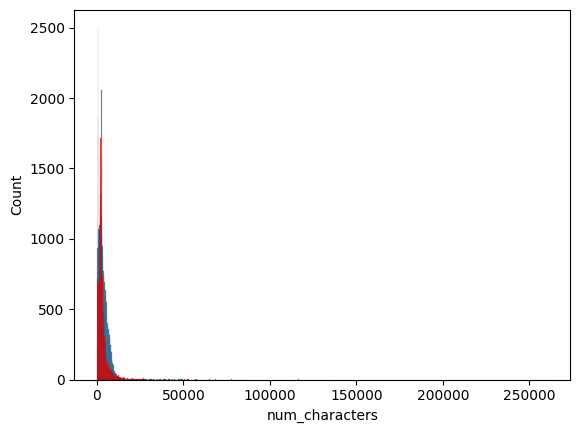

In [51]:
sns.histplot(df[df['label']==0]['num_characters'])
sns.histplot(df[df['label']==1]['num_characters'],color='red')

In [52]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kirta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem('loving')

'love'

In [56]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]#cloning
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [58]:
import swifter

# Apply transform_text function to both 'title' and 'text' columns and combine the results
df['transformed_text'] = df.swifter.apply(lambda row: transform_text(row['title']) + transform_text(row['text']), axis=1)


C:\Users\kirta\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Pandas Apply: 100%|██████████| 72134/72134 [6:36:15<00:00,  3.03it/s]        


In [60]:
from wordcloud import WordCloud
wc = WordCloud(width=600, height=600, min_font_size=10, background_color='white')


In [61]:
truenews=wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=" "))

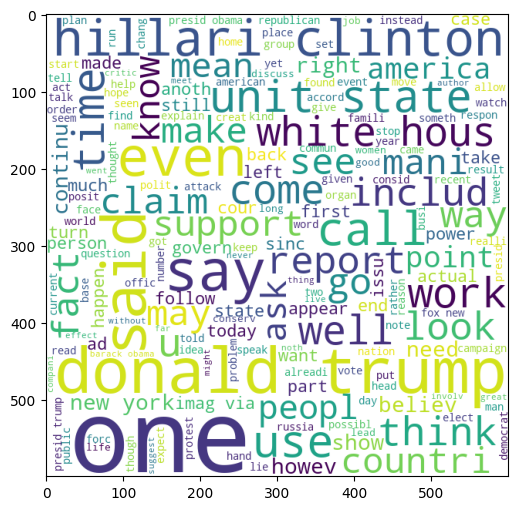

In [62]:
plt.figure(figsize=(15,6))
plt.imshow(truenews)

In [63]:
falsenews=wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=" "))

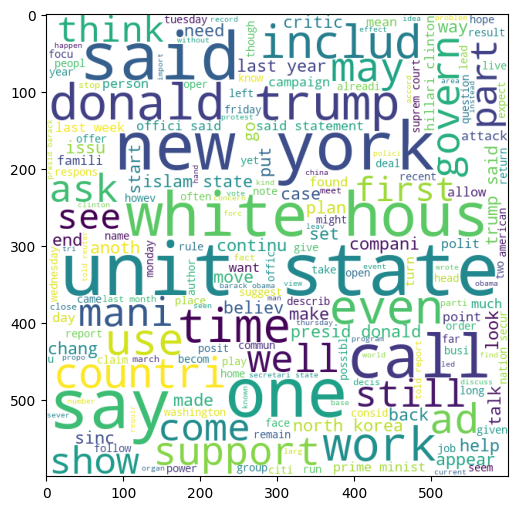

In [64]:
plt.figure(figsize=(15,6))
plt.imshow(falsenews)

In [65]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [66]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [67]:
import joblib
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [68]:
X.shape

(72134, 3000)

In [69]:
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
y=df['label'].values

In [71]:
y

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

## BEST FAKE NEWS DETECTION MODELS

### MULTINOMIAL NB MODEL

In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [75]:
mnb=MultinomialNB()

In [76]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)

predictedtext = transform_text("UNESCO declares PM Modi best Prime Minister")
input_tfidf = tfidf.transform([predictedtext])
user_prediction = mnb.predict(input_tfidf)
print("Predicted Label: ", user_prediction)

Predicted Label:  [0]


Accuracy: 0.8374575448811257
Precision: 0.8386175040935704
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      7017
           1       0.82      0.87      0.85      7410

    accuracy                           0.84     14427
   macro avg       0.84      0.84      0.84     14427
weighted avg       0.84      0.84      0.84     14427



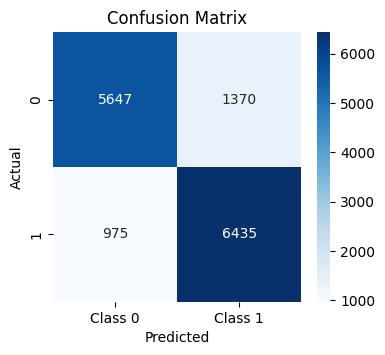

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

# Precision Score
precision = precision_score(y_test, y_pred2, average='macro')
print("Precision:", precision)

# Classification Report
class_report = classification_report(y_test, y_pred2)
print("Classification Report:")
print(class_report)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(4,3.5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", xticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.savefig("mnb_matrix.png")
plt.show()


mnb_metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'classification_report': class_report,  
}

# Dump the metrics dictionary into a file
with open('mnb_metrics.pkl', 'wb') as f:
    joblib.dump(mnb_metrics, f)

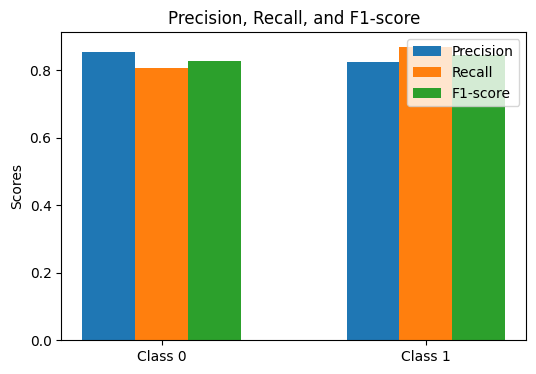

In [78]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred2)

# Plotting precision, recall, and F1-score
labels = ['Class 0', 'Class 1']
x = np.arange(len(labels)) 
width = 0.2  

fig, ax = plt.subplots(figsize=(6,4))

ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, fscore, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

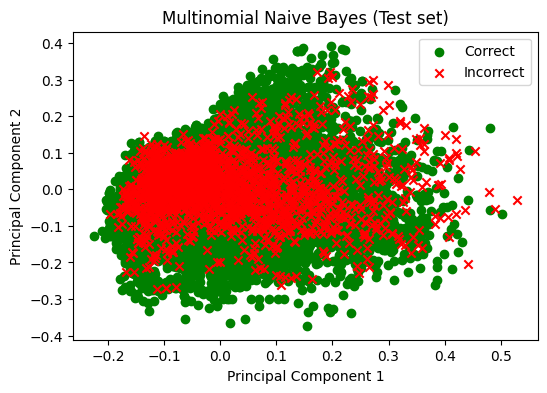

In [79]:
from sklearn.decomposition import PCA

# Get the predicted labels
y_pred = mnb.predict(X_test)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Create a boolean mask for correctly and incorrectly predicted points
correctly_predicted = (y_pred == y_test)
incorrectly_predicted = (y_pred != y_test)

plt.figure(figsize=(6, 4))

# Plotting the data points
plt.scatter(X_pca[correctly_predicted, 0], X_pca[correctly_predicted, 1], label='Correct', c='green', marker='o')
plt.scatter(X_pca[incorrectly_predicted, 0], X_pca[incorrectly_predicted, 1], label='Incorrect', c='red', marker='x')

plt.title('Multinomial Naive Bayes (Test set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig("mnb_test.png")
plt.show()

### RANDOM FOREST MODEL

In [80]:
from sklearn.ensemble import RandomForestClassifier


In [81]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=50,  
    max_depth=None,    
    max_features='sqrt',
    min_samples_split=5,
    n_jobs=-1,         
    random_state=42     
)


In [82]:
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)

predictedtext = transform_text("UNESCO declares PM Modi best Prime Minister")
input_tfidf = tfidf.transform([predictedtext])
user_prediction = rf.predict(input_tfidf)
print("Predicted Label: ", user_prediction)

Predicted Label:  [1]


Accuracy: 0.9432314410480349
Precision: 0.9441781129876345
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7017
           1       0.93      0.96      0.95      7410

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427



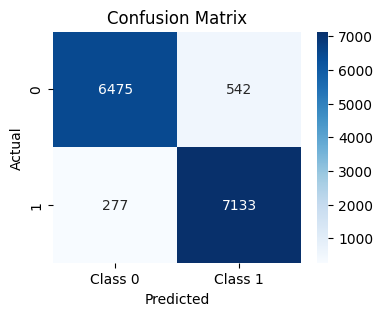

In [83]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision Score
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", xticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.savefig('rf_matrix.png')
plt.show()

rf_metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'classification_report': class_report,  
}

# Dump the metrics dictionary into a file
with open('rf_metrics.pkl', 'wb') as f:
    joblib.dump(rf_metrics, f)

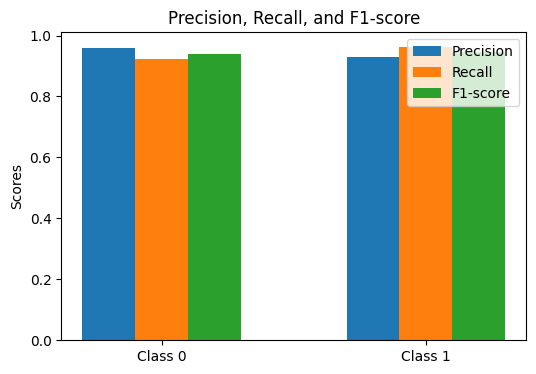

In [84]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

# Plotting precision, recall, and F1-score
labels = ['Class 0', 'Class 1']
x = np.arange(len(labels)) 
width = 0.2  

fig, ax = plt.subplots(figsize=(6,4))

ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, fscore, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

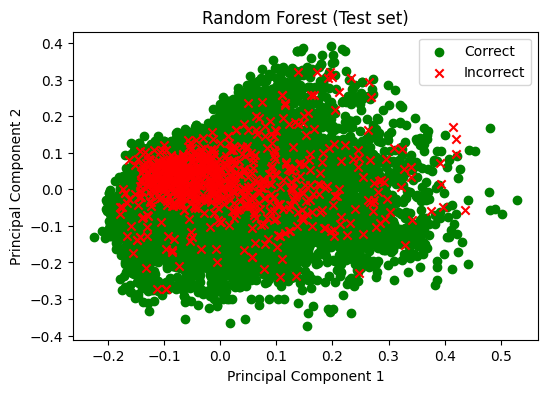

In [85]:
from sklearn.decomposition import PCA

# Get the predicted labels
y_pred = rf.predict(X_test)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Create a boolean mask for correctly and incorrectly predicted points
correctly_predicted = (y_pred == y_test)
incorrectly_predicted = (y_pred != y_test)

plt.figure(figsize=(6, 4))

# Plotting the data points
plt.scatter(X_pca[correctly_predicted, 0], X_pca[correctly_predicted, 1], label='Correct', c='green', marker='o')
plt.scatter(X_pca[incorrectly_predicted, 0], X_pca[incorrectly_predicted, 1], label='Incorrect', c='red', marker='x')

plt.title('Random Forest (Test set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('RF_test.png')
plt.show()

### LOGISTIC REGRESSION MODEL

In [86]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, y_train)
y_prediction = rf.predict(X_test)

predictedtext = transform_text("UNESCO declares PM Modi best Prime Minister")
input_tfidf = tfidf.transform([predictedtext])
user_prediction = lr.predict(input_tfidf)
print("Predicted Label: ", user_prediction)

Predicted Label:  [1]


Accuracy: 0.9432314410480349
Precision: 0.9441781129876345
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7017
           1       0.93      0.96      0.95      7410

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427



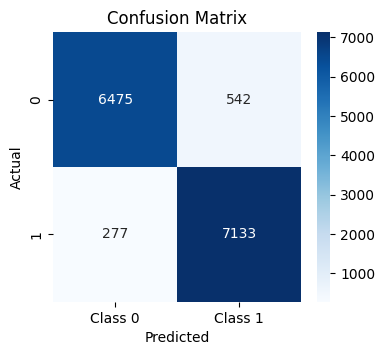

In [87]:
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy:", accuracy)

# Precision Score
precision = precision_score(y_test, y_prediction, average='macro')
print("Precision:", precision)

# Classification Report
class_report = classification_report(y_test, y_prediction)
print("Classification Report:")
print(class_report)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_prediction)
plt.figure(figsize=(4,3.5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", xticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.savefig('lr_matrix.png')
plt.show()

lr_metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'classification_report': class_report,  
}

# Dump the metrics dictionary into a file
with open('lr_metrics.pkl', 'wb') as f:
    joblib.dump(lr_metrics, f)

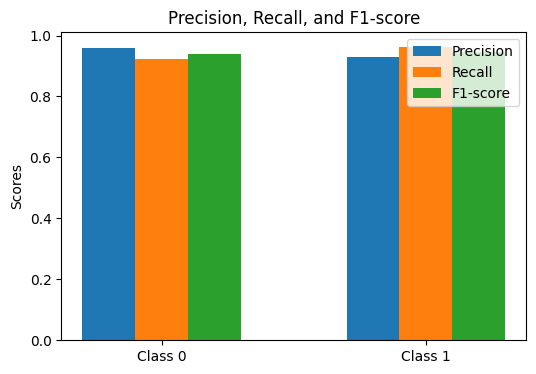

In [88]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_prediction)

# Plotting precision, recall, and F1-score
labels = ['Class 0', 'Class 1']
x = np.arange(len(labels)) 
width = 0.2  

fig, ax = plt.subplots(figsize=(6,4))

ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, fscore, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

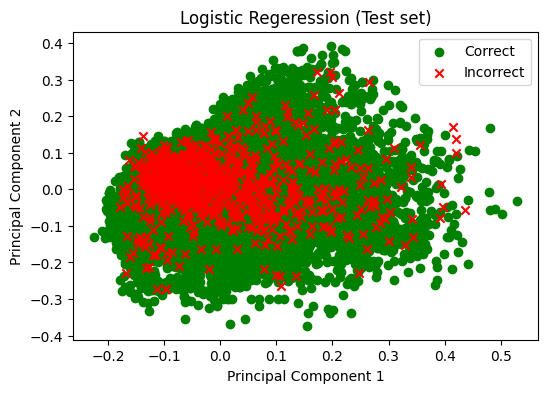

In [89]:
from sklearn.decomposition import PCA

# Get the predicted labels
y_pred = lr.predict(X_test)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Create a boolean mask for correctly and incorrectly predicted points
correctly_predicted = (y_pred == y_test)
incorrectly_predicted = (y_pred != y_test)

plt.figure(figsize=(6, 4))

# Plotting the data points
plt.scatter(X_pca[correctly_predicted, 0], X_pca[correctly_predicted, 1], label='Correct', c='green', marker='o')
plt.scatter(X_pca[incorrectly_predicted, 0], X_pca[incorrectly_predicted, 1], label='Incorrect', c='red', marker='x')

plt.title('Logistic Regeression (Test set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('lr_test.png')
plt.show()

### DECISION TREE CLASSIFIER MODEL

In [90]:
from sklearn.tree import DecisionTreeClassifier
ds=DecisionTreeClassifier(random_state=42)


In [91]:
ds.fit(X_train, y_train)

y_pred =ds.predict(X_test)


Accuracy: 0.9161987939280516
Precision: 0.9167781028723472
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      7017
           1       0.91      0.93      0.92      7410

    accuracy                           0.92     14427
   macro avg       0.92      0.92      0.92     14427
weighted avg       0.92      0.92      0.92     14427



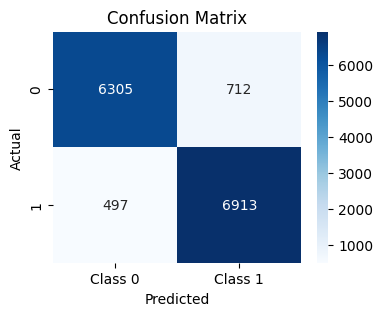

In [92]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision Score
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", xticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.savefig('ds_matrix.png')
plt.show()

ds_metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'classification_report': class_report,  
}

# Dump the metrics dictionary into a file
with open('ds_metrics.pkl', 'wb') as f:
    joblib.dump(ds_metrics, f)

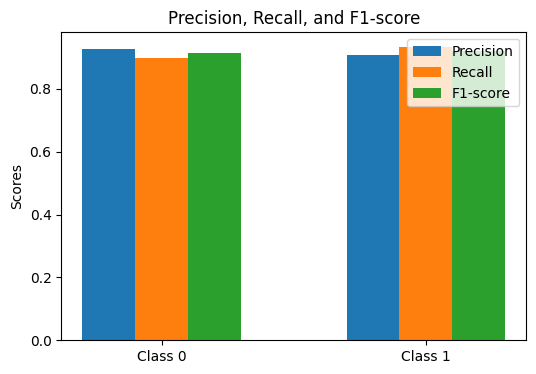

In [93]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

# Plotting precision, recall, and F1-score
labels = ['Class 0', 'Class 1']
x = np.arange(len(labels)) 
width = 0.2  

fig, ax = plt.subplots(figsize=(6,4))

ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, fscore, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

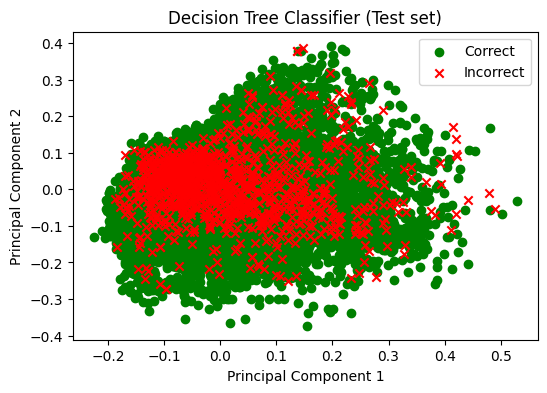

In [94]:
from sklearn.decomposition import PCA

# Get the predicted labels
y_pred = ds.predict(X_test)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Create a boolean mask for correctly and incorrectly predicted points
correctly_predicted = (y_pred == y_test)
incorrectly_predicted = (y_pred != y_test)

plt.figure(figsize=(6, 4))

# Plotting the data points
plt.scatter(X_pca[correctly_predicted, 0], X_pca[correctly_predicted, 1], label='Correct', c='green', marker='o')
plt.scatter(X_pca[incorrectly_predicted, 0], X_pca[incorrectly_predicted, 1], label='Incorrect', c='red', marker='x')

plt.title('Decision Tree Classifier (Test set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('ds_test.png')
plt.show()

### XG BOOST MODEL

In [95]:
import xgboost as xgb

# Instantiate the XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Predict using the trained model
y_prediction_xgb = xgb_model.predict(X_test)


Accuracy: 0.9543217578152076
Precision: 0.9551355982316905
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      7017
           1       0.94      0.97      0.96      7410

    accuracy                           0.95     14427
   macro avg       0.96      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427



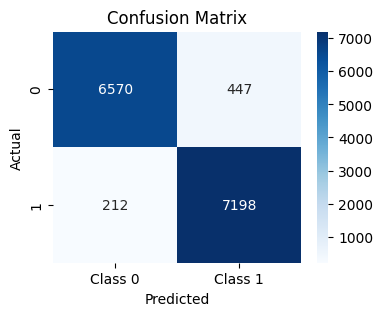

In [96]:
accuracy = accuracy_score(y_test, y_prediction_xgb)
print("Accuracy:", accuracy)

# Precision Score
precision = precision_score(y_test, y_prediction_xgb, average='macro')
print("Precision:", precision)

# Classification Report
class_report = classification_report(y_test, y_prediction_xgb)
print("Classification Report:")
print(class_report)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_prediction_xgb)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", xticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.savefig('xg_matrix.png')
plt.show()

xg_metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'classification_report': class_report,  
}

# Dump the metrics dictionary into a file
with open('xg_metrics.pkl', 'wb') as f:
    joblib.dump(xg_metrics, f)

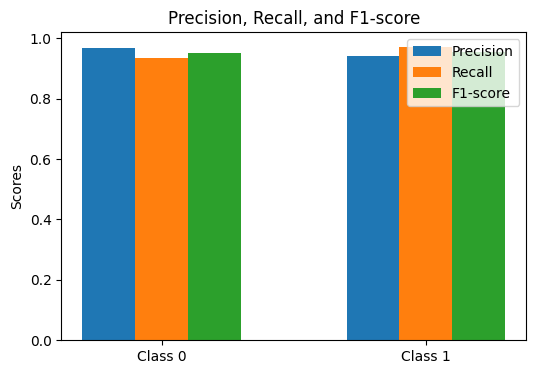

In [97]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_prediction_xgb)

# Plotting precision, recall, and F1-score
labels = ['Class 0', 'Class 1']
x = np.arange(len(labels)) 
width = 0.2  

fig, ax = plt.subplots(figsize=(6,4))

ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, fscore, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

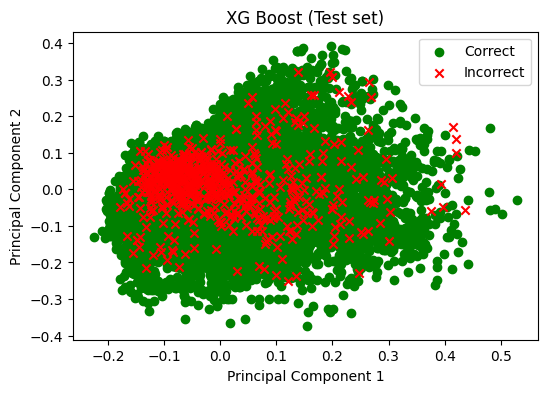

In [98]:
from sklearn.decomposition import PCA

# Get the predicted labels
y_pred = xgb_model.predict(X_test)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Create a boolean mask for correctly and incorrectly predicted points
correctly_predicted = (y_pred == y_test)
incorrectly_predicted = (y_pred != y_test)

plt.figure(figsize=(6, 4))

# Plotting the data points
plt.scatter(X_pca[correctly_predicted, 0], X_pca[correctly_predicted, 1], label='Correct', c='green', marker='o')
plt.scatter(X_pca[incorrectly_predicted, 0], X_pca[incorrectly_predicted, 1], label='Incorrect', c='red', marker='x')

plt.title('XG Boost (Test set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('xg_test.png')
plt.show()

### MLP (A DEEP NETWORK MODEL)

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the MLP model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Use 'softmax' if you have more than two classes
])

model.summary()  # Prints the summary of the model

C:\Users\kirta\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,536,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,668,097 (6.36 MB)

 Trainable params: 1,668,097 (6.36 MB)

 Non-trainable params: 0 (0.00 B)

In [100]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [101]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=25,
                    validation_split=0.2)

Epoch 1/20
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8961 - loss: 0.2543 - val_accuracy: 0.9426 - val_loss: 0.1463
Epoch 2/20
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9629 - loss: 0.0985 - val_accuracy: 0.9543 - val_loss: 0.1241
Epoch 3/20
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9891 - loss: 0.0348 - val_accuracy: 0.9522 - val_loss: 0.1507
Epoch 4/20
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9967 - loss: 0.0117 - val_accuracy: 0.9541 - val_loss: 0.1991
Epoch 5/20
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9975 - loss: 0.0088 - val_accuracy: 0.9553 - val_loss: 0.2145
Epoch 6/20
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9979 - loss: 0.0056 - val_accuracy: 0.9539 - val_loss: 0.2155
Epoch 7/20
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9980 - loss: 0.0064 - val_accuracy: 0.9529 - val_loss: 0.2995
Epoch 8/20
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9989 - loss: 

451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.9555001039717197
Precision: 0.9554100090779926
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7017
           1       0.96      0.95      0.96      7410

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427



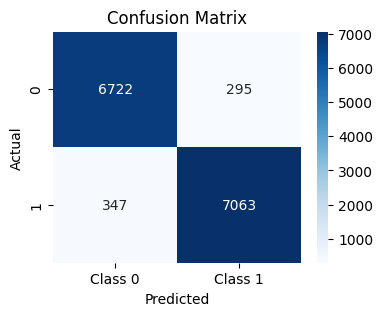

In [102]:
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary predictions based on a threshold (e.g., 0.5)
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision Score
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", xticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.savefig('mlp_matrix.png')
plt.show()

mlp_metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'classification_report': class_report,  
}

# Dump the metrics dictionary into a file
with open('mlp_metrics.pkl', 'wb') as f:
    joblib.dump(mlp_metrics, f)

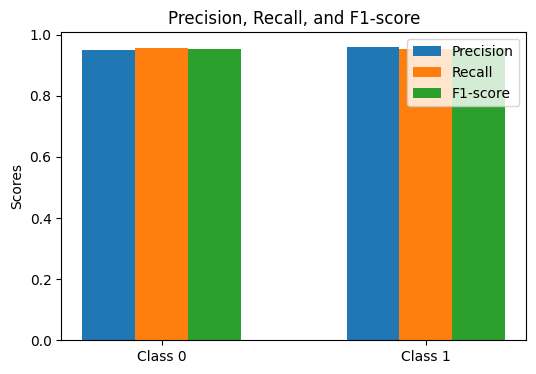

In [103]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

# Plotting precision, recall, and F1-score
labels = ['Class 0', 'Class 1']
x = np.arange(len(labels)) 
width = 0.2  

fig, ax = plt.subplots(figsize=(6,4))

ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, fscore, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

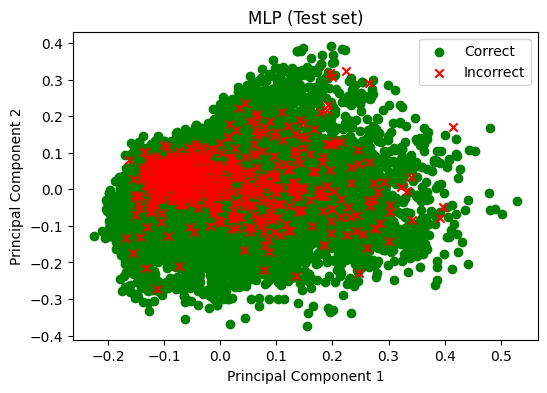

In [104]:
from sklearn.decomposition import PCA

# Transform the test data using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Create a boolean mask for correctly and incorrectly predicted points
correctly_predicted = (y_pred.flatten() == y_test)
incorrectly_predicted = ~correctly_predicted

plt.figure(figsize=(6, 4))

# Plotting the data points
plt.scatter(X_pca[correctly_predicted, 0], X_pca[correctly_predicted, 1], label='Correct', c='green', marker='o')
plt.scatter(X_pca[incorrectly_predicted, 0], X_pca[incorrectly_predicted, 1], label='Incorrect', c='red', marker='x')

plt.title('MLP (Test set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('mlp_test.png')
plt.show()


In [105]:
import pickle

# Define the models dictionary
models = {
    'MultinomialNB': mnb,
    'RandomForest': rf,
    'LogisticRegression': lr,
    'DecisionTree': ds,
    'XGBoost': xgb_model,
}

# Save all models in a pkl file
with open('models.pkl', 'wb') as f:
    pickle.dump(models, f)

from tensorflow.keras.models import save_model

# Save the model
save_model(model, "mlp_model.h5")
